In [2]:
%matplotlib inline
import os
import time
from pandas import DataFrame
from IPython.display import Image, display
import astropy
from astropy.io import fits
import matplotlib.pyplot as plt

astropy.log.setLevel('ERROR')

In [3]:
datafolder = '/data'

In [4]:
all_files = []
for root, _, files in os.walk(datafolder):
    for file_ in files:
        if file_.startswith('.'):
            continue
        full_path = os.path.join(root, file_)
        size = os.path.getsize(full_path)
        modified = time.ctime(os.path.getmtime(full_path))
        all_files += [(full_path, size, modified)]
DataFrame(all_files, columns=('name', 'size', 'modified'))


,name,size,modified
0,/data/HorseHead.fits,1650240,Wed Nov 26 15:36:17 2014
1,/data/rodrigues/input/parameters.json,26,Fri Mar 20 10:46:26 2015
2,/data/rodrigues/output/bash,1021112,Fri Mar 20 10:46:30 2015
3,/data/rodrigues/output/parameters.json,26,Fri Mar 20 10:46:26 2015
4,/data/rodrigues/output/results-dirty.fits,16787520,Wed Mar 25 13:40:37 2015
5,/data/rodrigues/output/results-uvcov.png,182308,Wed Mar 25 13:40:28 2015
6,/data/rodrigues/output/results.dirty.fits,1059840,Wed Mar 4 13:37:09 2015
7,/data/rodrigues/output/results.model.fits,1059840,Wed Mar 4 13:37:09 2015
8,/data/rodrigues/output/results.residual.fits,1056960,Wed Mar 4 13:37:09 2015
9,/data/rodrigues/output/results.restored.fits,1062720,Wed Mar 4 13:37:09 2015


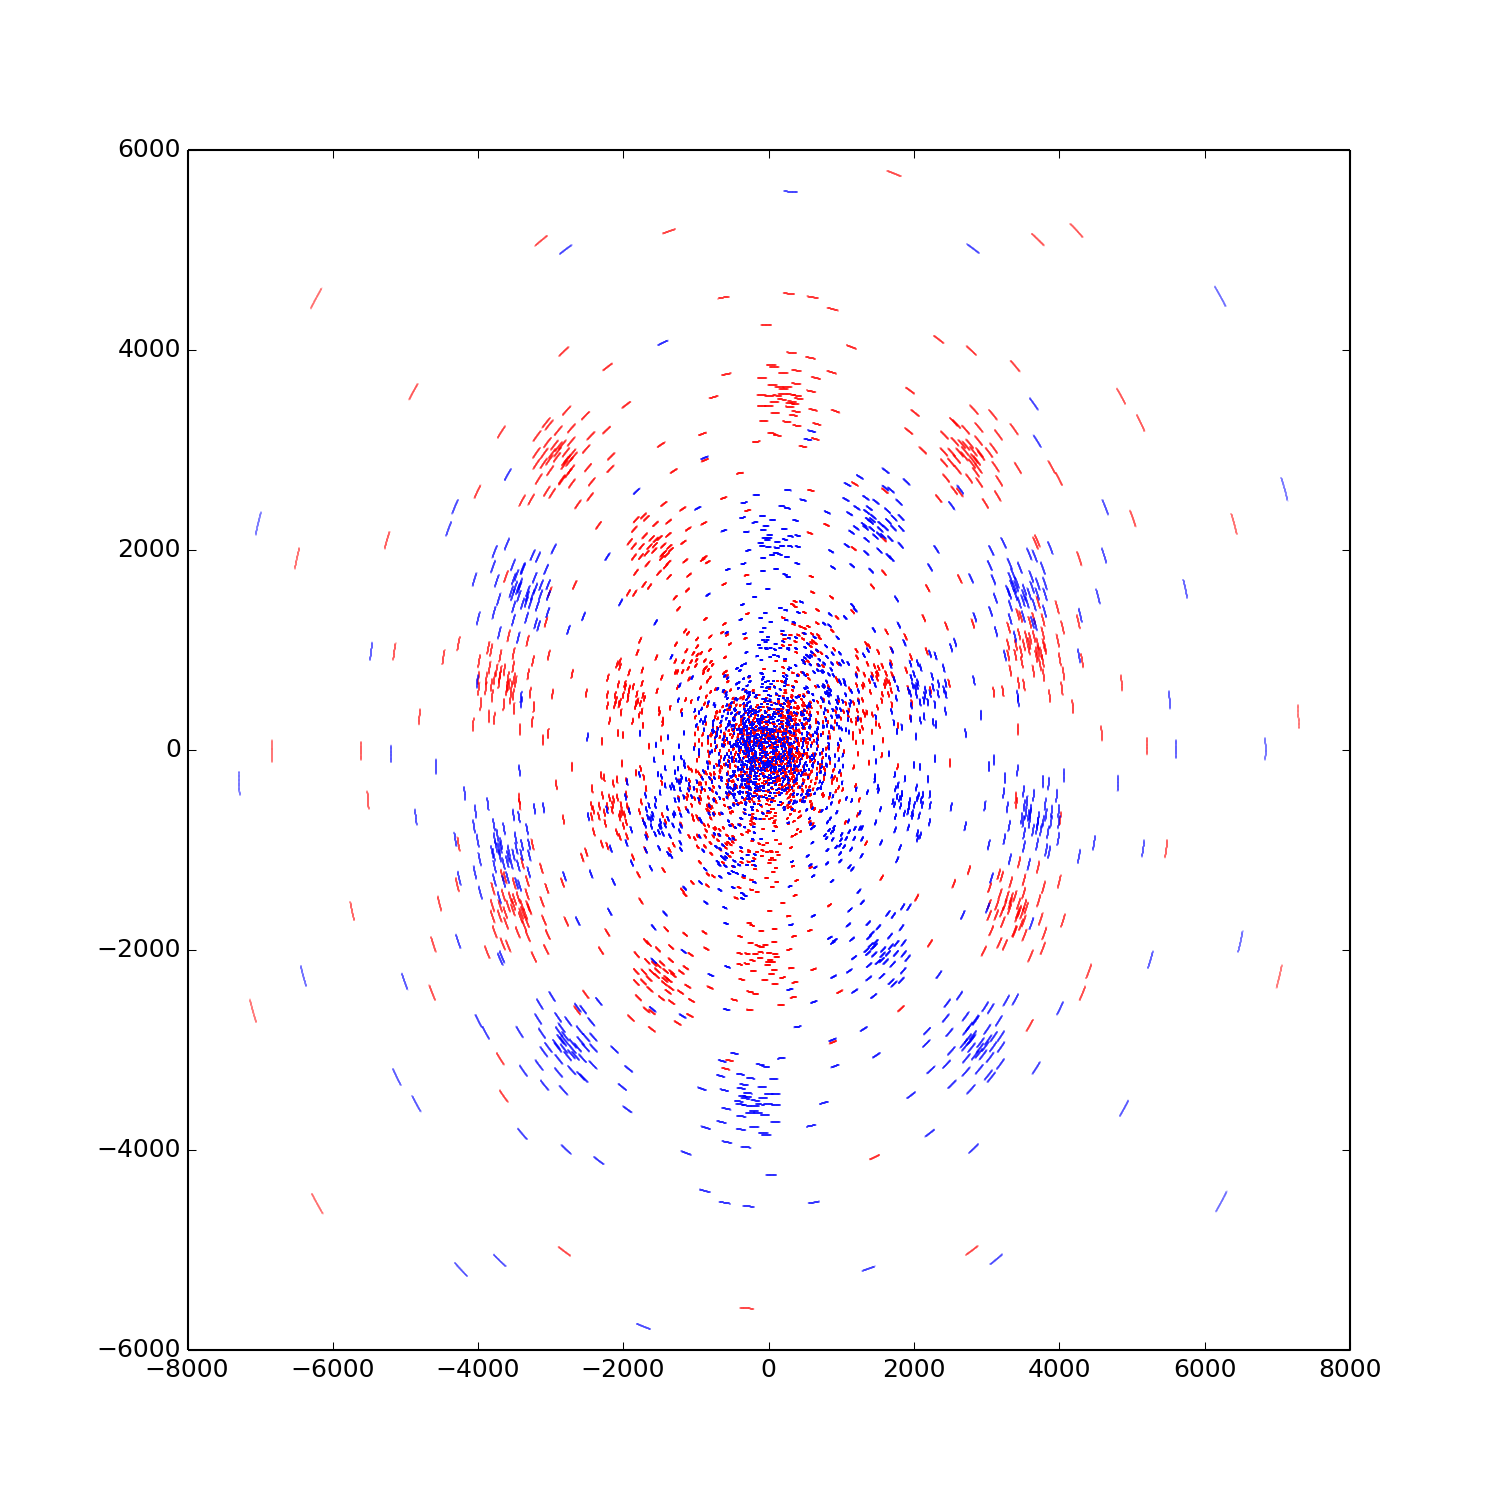

In [5]:
for name, _, _ in all_files:
    if name.lower()[-3:] in ('png', 'jpg', 'jpeg'):
        display(Image(name, width=500))

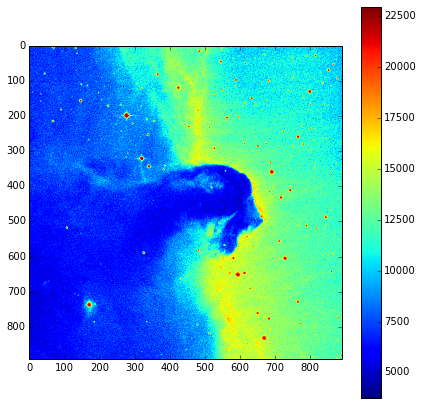

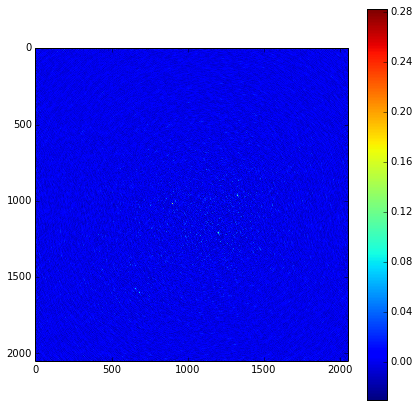

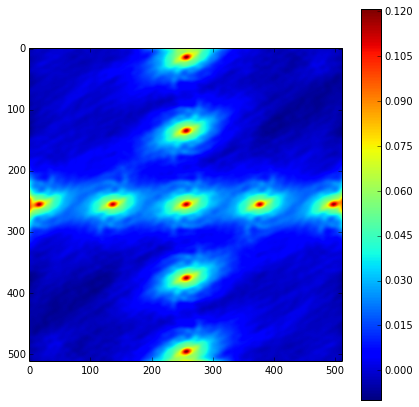

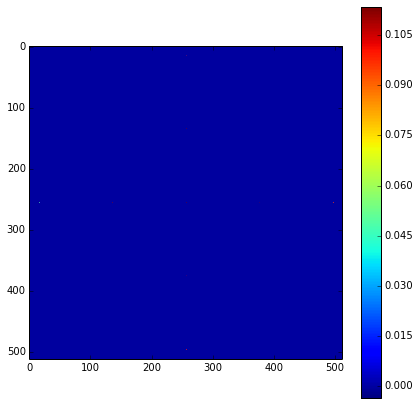

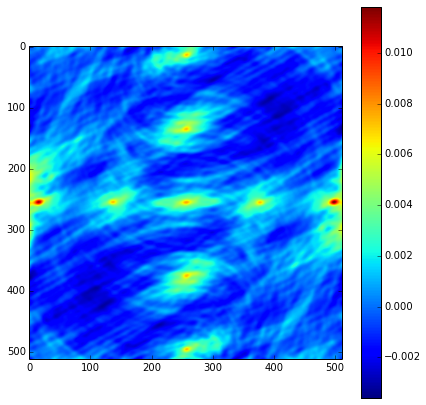

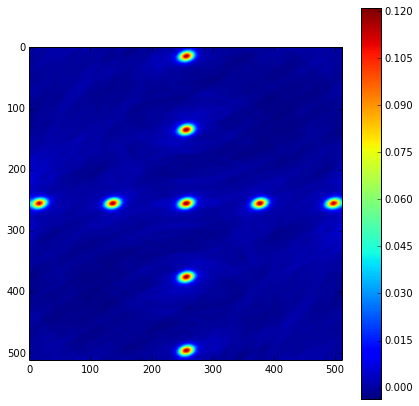

In [23]:

for name, _, _ in all_files:
    if name.lower()[-3:] in ('fits'):
        image_data = fits.getdata(name).squeeze()
        fig = plt.figure(figsize=(7,7))
        plt.imshow(image_data)
        plt.colorbar()
